<a href="https://colab.research.google.com/github/matiaslopezs/analisisComplaints/blob/main/AnalisisComplaints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento de datos inicial

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None) #MOSTRAR TODAS LAS COLUMNAS

Records dataframe

In [2]:
!gdown --id 1PGecRbbl4KlQ9SWvuZ9ekH1cjy4fwTf2 

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1PGecRbbl4KlQ9SWvuZ9ekH1cjy4fwTf2
To: /content/ComplaintsUnificado.csv
100% 3.45M/3.45M [00:00<00:00, 266MB/s]


In [3]:
!gdown --id 1Pu75kONToz6MiTxuDCoMRBRG3SBKBVO8
!gdown --id 1DeJebO2PtHQ10CFzOS1fCNs2bCSZ5T7j
!gdown --id 1CuDTzC-zJWG3bKnSO2DJ5shi2_-A1ys8
!gdown --id 1FPNWBL6Ecgm4suqql_HZcrShzMReJvOe
!gdown --id 1xUMO3uCn9sGjt9yQanZW7puiNr9n6HK0
!gdown --id 1ODoDzFZKi5wCgkDFLLyxoKTESgy8ajET
!gdown --id 16psIXMtkmqE_pMg208F6zbL26NcBiK4X

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Pu75kONToz6MiTxuDCoMRBRG3SBKBVO8
To: /content/records2017.csv
100% 15.5M/15.5M [00:00<00:00, 79.7MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1DeJebO2PtHQ10CFzOS1fCNs2bCSZ5T7j
To: /content/records2018.csv
100% 15.0M/15.0M [00:00<00:00, 23.7MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
F

Cargamos los complains y records por año en varios dataframes

In [4]:
df_complains = pd.read_csv('ComplaintsUnificado.csv')
df_interv = pd.read_csv('Intervenients Unificado.csv')
df_records_2017 = pd.read_csv('records2017.csv')
df_records_2018 = pd.read_csv('records2018.csv')
df_records_2019 = pd.read_csv('records2019.csv')
df_records_2020 = pd.read_csv('records2020.csv')
df_records_2021 = pd.read_csv('records2021.csv')
df_records_2022 = pd.read_csv('records2022.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (60,61,62,63) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Unimos los dataframes de records y mergeamos los datos de complaints

In [5]:
df_records = pd.concat([df_records_2017, df_records_2018,df_records_2019, df_records_2020, df_records_2021, df_records_2022], axis=0, ignore_index=True)
complaints_merge = df_complains.merge(df_records,on='compiledRelease/id',how='left')

verificamos que las filas sean unicas

In [6]:
df_records['compiledRelease/id'].value_counts()

401119-adquisicion-combustibles-uso-institucional-municipalidad-dr-juan-eulogio-estigarribi-2-1629382617          2
ocds-03ad3f-282786-2017-01-26T15:55:24-04:00                                                                      1
383151-1591180714                                                                                                 1
382980-adquisicion-servicio-provision-distribucion-kits-alimentos-no-perecederos-como-modal-1-1593599450.37818    1
373531-construccion-pavimento-tipo-empedrado-km-14-monday-18-monday-19-acaray-20-monday-21-1-1594044136.46992     1
                                                                                                                 ..
346923-adquisicion-uniformes-personal-servicios-seguridad-equipos-proteccion-laboratorios-1-1554798795.44812      1
359320-adquisicion-productos-papel-elaborados-criterios-procesos-sustentabilidad-1-1554917484                     1
357470-reparacion-mejoramiento-terminal-omnibus-curuguaty-1-1556208764  

In [7]:
complaints_merge['compiledRelease/complaints/0/id'].value_counts()

153.0     9
193.0     8
134.0     8
159.0     8
199.0     8
         ..
1515.0    1
1740.0    1
1661.0    1
1547.0    1
1652.0    1
Name: compiledRelease/complaints/0/id, Length: 1816, dtype: int64

In [8]:
complaints_merge['compiledRelease/id'].value_counts()

339040-lpn-122-17-adquisicion-insumos-generales-ips-ad-referendum-2018-1-1657032536.27286                       24
354118-cursos-capacitacion-laboral-plurianual-1-1544811700                                                      21
392633-lpn-sbe-46-21-adquisicion-medicamentos-biologicos-biotecnologicos-oncologicos-e-inmu-1-1657640076        21
333964-lp1335-17-servicio-despachos-aduaneros-modalidad-contrato-abierto-ad-referendum-1-1593605937.016         21
371093-cursos-capacitacion-laboral-plurianual-1-1624370575.08077                                                20
                                                                                                                ..
339425-servicio-transporte-materia-prima-cantera-trituradora-principal-fca-vallemi-1-1566641635                  1
330982-adquisicion-equipos-oficina-senasa-1-1567110945                                                           1
333197-construccion-canal-lateral-pbc-reparacion-empedrado-muro-contencion-pbc-a

verificamos que una impugnación no tenga el mismo complaint dos veces (que no hayan repetidos)

In [9]:
# complaints_merge.groupby('compiledRelease/id')['compiledRelease/complaints/0/id'].nunique()
complaints_merge["idsconcat"] = complaints_merge['compiledRelease/id'].astype(str) +"-"+ complaints_merge["compiledRelease/complaints/0/id"].astype(str)

In [10]:
complaints_merge["idsconcat"].value_counts()

310567-provision-almuerzo-escolar-escuelas-ciudad-san-lorenzo-1-1483429264-595.0                                      1
397292-provision-alimentos-bebidas-alcohol-agentes-electorales-cumplimiento-dispuesto-art-1-1635407852.976-473.0      1
376792-lpn-n-02-2020-adquisicion-equipos-informaticos-sbe-ad-referendum-1-1633513473.12875-1067.0                     1
396288-adquisicion-repuestos-accesorios-menores-vehiculos-1-1634803503.775-547.0                                      1
339735-lpn-14-18-diseno-construccion-centro-medicina-fisica-rehabilitacion-psicologia-salud-1-1634830328.564-745.0    1
                                                                                                                     ..
352207-adquisicion-pet-coke-petroleo-fabrica-vallemi-1-1566889743-1215.0                                              1
338407-adquisicion-ascensor-vidriado-area-publica-aisp-1-1566904392-364.0                                             1
286313-senalizacion-carteles-varios-1-15

Complaints por tipo de protesta

In [11]:
complaints_merge.groupby(['compiledRelease/complaints/0/type'])['compiledRelease/complaints/0/type'] \
                             .count() \
                             .reset_index(name='Cuenta') \
                             .sort_values(['Cuenta'], ascending=False) \
                             .head(5)

,compiledRelease/complaints/0/type,Cuenta
2,Protesta contra resultado,3749
1,Protesta contra pliego de bases y condiciones,3044
0,Protesta acumulada,550


Complaints por convocante (investigar campo: compiledRelease/buyer/name)

In [12]:
complaints_merge.groupby(['compiledRelease/tender/procuringEntity/name'])['compiledRelease/tender/procuringEntity/name'] \
                             .count() \
                             .reset_index(name='Cuenta') \
                             .sort_values(['Cuenta'], ascending=False) \
                             .head(10)

,compiledRelease/tender/procuringEntity/name,Cuenta
117,Instituto de Previsión Social (IPS),619
129,Ministerio de Salud Pública y Bienestar Social...,534
0,Administración Nacional de Electricidad (ANDE),358
127,Ministerio de Obras Públicas y Comunicaciones ...,343
325,Policia Nacional / Ministerio del Interior,195
123,Ministerio de Educación y Ciencias (MEC),161
51,Dirección Nacional de Aeronáutica Civil (DINAC),145
67,Facultad de Ciencias Medicas / Universidad Nac...,144
7,Banco Nacional de Fomento (BNF),138
324,Petróleos Paraguayos (PETROPAR),130


Complaints por estado

In [13]:
complaints_merge['compiledRelease/complaints/0/status'].value_counts()

Resuelto             5228
Rechazo in limine    1894
En trámite            101
Duplicado              69
Tramitado              31
Acumulado              17
Archivado               3
Name: compiledRelease/complaints/0/status, dtype: int64

Complaints por modalidad

In [14]:
complaints_merge['compiledRelease/tender/procurementMethodDetails'].value_counts()

Licitación Pública Nacional                                                                   4222
Concurso de Ofertas                                                                           1455
Contratación Directa                                                                          1209
Licitación Pública Internacional                                                               249
Contratación por Excepción                                                                     117
BID - Licitación Internacional                                                                  21
LPN_SBE_DNCP_BID - LICITACIÓN PUBLICA NACIONAL POR SBE SISTEMA NACIONAL BID BIENES COMUNES      11
Acuerdo Nacional                                                                                10
BID - Licitación Pública Nacional                                                                6
BM - Licitación Pública Internacional - LPI                                                      6
BID - Conc

Por estado de licitacion

In [15]:
complaints_merge['compiledRelease/tender/statusDetails'].value_counts()

Adjudicada                   6373
Anulada o Cancelada           490
En Evaluacion (Cerrada)       188
Desierta                      165
En Convocatoria (Abierta)      58
Suspendida                     52
Inconsistente                   4
Precalificado                   1
Name: compiledRelease/tender/statusDetails, dtype: int64

Por tipo de solicitud

In [16]:
complaints_merge['compiledRelease/tender/mainProcurementCategory'].value_counts()

goods       3795
services    2514
works       1022
Name: compiledRelease/tender/mainProcurementCategory, dtype: int64

Por descripcion de solicitud

In [17]:
complaints_merge['compiledRelease/tender/mainProcurementCategoryDetails'].value_counts()

Obras - Construcción, Restauración, Reconstrucción o Remodelación y Reparación de Inmuebles                                              1022
Bienes - Equipos, Productos e instrumentales Médicos y de Laboratorio. Servicios asistenciales de salud                                   979
Servicios - Servicios de Limpiezas, Mantenimientos y reparaciones menores y mayores de Instalaciones, Maquinarias y Vehículos             905
Bienes - Equipos, accesorios y programas computacionales, de oficina, educativos, de imprenta, de comunicación y señalamiento             884
Servicios - Servicios de ceremonial, gastronomico y funerarios                                                                            624
Bienes - Productos Alimenticios                                                                                                           394
Servicios - Servicios Técnicos                                                                                                            363
Bienes

Cantidad de protesta por protestante

In [18]:
options = ['claimant'] # selecting rows based on condition 
interv_just_claimants = df_interv[df_interv['compiledRelease/complaints/0/intervenients/0/roles'].isin(options)]
interv_just_claimants['compiledRelease/complaints/0/intervenients/0/name'].value_counts()

DATA LAB SA                                   156
MASTER SOFT PARAGUAY SRL                      108
LAKMI S.A.                                     83
DATA SYSTEMS SA EMISORA DE CAPITAL ABIERTO     81
EUROQUIMICA S.A.                               75
                                             ... 
M.C.N. SRL                                      1
DOMINGO ALEJANDRO LEIVA RIVERA                  1
C.A.O. S.R.L.                                   1
CALTEC S.R.L.                                   1
EOS S.R.L.                                      1
Name: compiledRelease/complaints/0/intervenients/0/name, Length: 2354, dtype: int64

# Usando datos de banderas rojas extraidos del elastic search

Obteniendo datos de banderas rojas por OCDS_ID de los ultimos 5 años

In [19]:
!gdown --id 1g7UxONan6NAlldgk4mE2PVRhk0f5oSFS
banderas_df = pd.read_csv('elastic_export2017-2022.csv')

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1g7UxONan6NAlldgk4mE2PVRhk0f5oSFS
To: /content/elastic_export2017-2022.csv
100% 3.64M/3.64M [00:00<00:00, 256MB/s]


Agrupando filas usando el id y concatenando string de banderas

In [20]:
# https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
# https://stackoverflow.com/questions/39300163/pandas-concat-strings-after-groupby-in-column-ignore-nan-ignore-duplicates
grouped_banderas = banderas_df.groupby(['compiledRelease/id'])['bandera'].apply(lambda x: '' if x.isnull().any() else ','.join(x) ).reset_index()

In [21]:
banderas_records_merge = df_records.merge(grouped_banderas, how='left',left_on='Open Contracting ID', right_on='compiledRelease/id')
# complaints_banderas_merge = df_complains.merge(banderas_records_merge,on='compiledRelease/id',how='left')

In [22]:
banderas_records_merge.head()

,Open Contracting ID,compiledRelease/id_x,compiledRelease/tag,compiledRelease/date,compiledRelease/ocid,compiledRelease/secondStage/id,compiledRelease/initiationType,compiledRelease/language,compiledRelease/tender/id,compiledRelease/tender/techniques/hasFrameworkAgreement,compiledRelease/tender/title,compiledRelease/tender/status,compiledRelease/tender/statusDetails,compiledRelease/tender/submissionMethod,compiledRelease/tender/submissionMethodDetails,compiledRelease/tender/bidOpening/date,compiledRelease/tender/bidOpening/address/streetAddress,compiledRelease/tender/eligibilityCriteria,compiledRelease/tender/enquiriesAddress/streetAddress,compiledRelease/tender/mainProcurementCategoryDetails,compiledRelease/tender/datePublished,compiledRelease/tender/tenderPeriod/endDate,compiledRelease/tender/tenderPeriod/startDate,compiledRelease/tender/awardPeriod/startDate,compiledRelease/tender/contractPeriod/startDate,compiledRelease/tender/contractPeriod/endDate,compiledRelease/tender/enquiryPeriod/endDate,compiledRelease/tender/enquiryPeriod/startDate,compiledRelease/tender/enquiryPeriod/durationInDays,compiledRelease/tender/mainProcurementCategory,compiledRelease/tender/procurementMethod,compiledRelease/tender/procurementMethodDetails,compiledRelease/tender/procuringEntity/id,compiledRelease/tender/procuringEntity/name,compiledRelease/tender/tenderPeriod/durationInDays,compiledRelease/tender/additionalProcurementCategories,compiledRelease/tender/awardCriteria,compiledRelease/tender/awardCriteriaDetails,compiledRelease/tender/hasEnquiries,compiledRelease/tender/value/amount,compiledRelease/tender/value/currency,compiledRelease/tender/contractPeriod/maxExtentDate,compiledRelease/tender/numberOfTenderers,compiledRelease/buyer/id,compiledRelease/buyer/name,compiledRelease/tender/coveredBy,compiledRelease/planning/identifier,compiledRelease/planning/estimatedDate,compiledRelease/planning/budget/description,compiledRelease/planning/budget/amount/currency,compiledRelease/planning/budget/amount/amount,compiledRelease/tender/contractPeriod/durationInDays,compiledRelease/tender/techniques/hasElectronicAuction,compiledRelease/tender/procurementIntention/id,compiledRelease/tender/procurementIntention/uri,compiledRelease/tender/procurementIntention/category,compiledRelease/tender/procurementIntention/title,compiledRelease/tender/procurementIntention/description,compiledRelease/tender/procurementIntention/startDate,compiledRelease/tender/procurementIntention/publishedDate,compiledRelease/tender/procurementIntention/procuringEntity/id,compiledRelease/tender/procurementIntention/procuringEntity/name,compiledRelease/tender/procurementIntention/status,compiledRelease/tender/procurementIntention/statusDetails,compiledRelease/tender/procurementMethodRationale,compiledRelease/tender/procurementIntention/rationale,compiledRelease/id_y,bandera
0,ocds-03ad3f-282786,ocds-03ad3f-282786-2017-01-26T15:55:24-04:00,compiled,2017-01-26T15:55:24-04:00,ocds-03ad3f-282786,282786-adquisicion-elementos-limpieza-ejercici...,tender,es,282786-adquisicion-elementos-limpieza-ejercici...,True,ADQUISICION DE ELEMENTOS DE LIMPIEZA PARA EL E...,complete,Con Convenio Finalizado,inPerson,Lugar entrega ofertas: EDIFICIO DNCP EE.UU.961...,2014-11-27T10:15:00-04:00,EDIFICIO DNCP EE.UU.961 C/ TTE. FARIÑA - 2DO P...,Restricciones: Inhabilidades previstas en el a...,EDIFICIO DNCP EE.UU.961 C/ TTE. FARIÑA - MESA ...,Elementos e insumos de limpieza,2014-10-14T08:05:52-04:00,2014-11-27T10:00:00-04:00,2014-10-14T08:05:52-04:00,2014-11-27T10:15:00-04:00,2015-03-06T00:00:00-04:00,2015-11-28T00:00:00-04:00,2014-11-20T16:00:00-04:00,2014-10-14T08:05:52-04:00,37.0,goods,open,Licitación Pública Nacional,DNCP-SICP-CODE-326,Dirección Nacional de Contrataciones Públicas ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ocds-03ad3f-2016-476,476-2016-proyecto-construccion-operacion-mante...,compiled,2017-01-03

# Gráficos útiles para estudiar los Nuevos datos

importamos la librería matplotlib que sirve para graficar

In [23]:
import matplotlib.pyplot as plt

### Gráfico de banderas activadas según cantidad de activaciones

**x**: nombre de la bandera

**y**: cantidad de activaciones

primero listamos todas las banderas que fueron activadas en nuestro dataframe

In [24]:
lista_banderas = banderas_records_merge['bandera'].explode().unique()

luego contamos cantidad de apariciones

In [25]:
lista_apariciones_band = banderas_records_merge['bandera'].explode().value_counts()

In [ ]:
# all rows in the dataframe
pd.set_option('display.max_rows', None)
pd.DataFrame(list(zip(lista_banderas, lista_apariciones_band)),
               columns =['Nombre', 'Cantidad'])

In [ ]:
# plt.bar(lista_banderas, lista_apariciones_band)
# len(list(lista_banderas))
# len(list(lista_apariciones_band))
# lista_apariciones_band
plt.bar(lista_apariciones_band,lista_apariciones_band.keys())

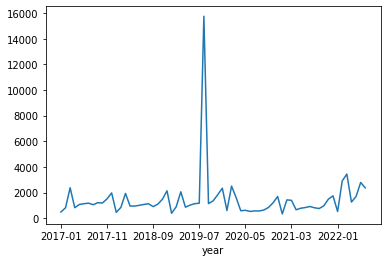

In [77]:
banderas_records_merge['year'] = banderas_records_merge.apply(lambda x: x['compiledRelease/date'][0:7], axis=1)
df_records_to_plot = banderas_records_merge.groupby(['year']).size()
df_records_to_plot.plot(kind = 'line')

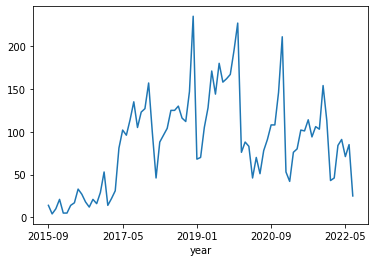

In [73]:
banderas_complaints_merge = complaints_merge.merge(grouped_banderas, how='left',left_on='Open Contracting ID', right_on='compiledRelease/id')
banderas_complaints_merge = banderas_complaints_merge.drop([7343, 7343])
banderas_complaints_merge['year'] = banderas_complaints_merge.apply(lambda x: x['compiledRelease/complaints/0/date'][0:7], axis=1)
df_to_plot = banderas_complaints_merge.groupby(['year']).size()
df_to_plot.plot(kind = 'line')

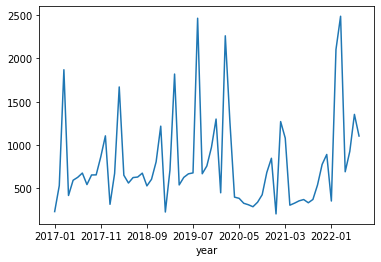

In [74]:
banderas_merge_wo_na = banderas_records_merge.dropna(subset=['bandera'])
banderas_merge_wo_na = banderas_merge_wo_na[banderas_merge_wo_na['bandera'] != '']
banderas_merge_wo_na['year'] = banderas_merge_wo_na.apply(lambda x: x['compiledRelease/date'][0:7], axis=1)
df_ban_wo_na_plot = banderas_merge_wo_na.groupby(['year']).size()
df_ban_wo_na_plot.plot(kind = 'line')
# banderas_merge_wo_na.shape